In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import constants as cnst


plt.rcParams['text.usetex'] = True
plt.style.use(['science','notebook','grid'])
#constants

c= cnst.c
hbar = cnst.hbar
h=cnst.h
qe = cnst.e
me = cnst.m_e
ub = (qe*hbar)/(2*me)
u0 = cnst.mu_0
pi = np.pi

## Global Data

In [524]:
# all in meters
length = 20 * (10**(-3))
width = 10 * (10**(-3))
depth = (10**(-3))

# P-TYPE

## vs. Current

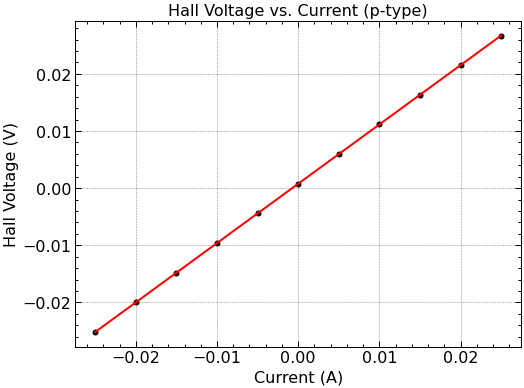

0.127
0.008171796707229782


In [525]:
data=pd.read_csv('data/ptype_retrial/vcurrent.csv')

Vs = data['Vs'].values
Vh = data['Vh'].values
B = data['B'].values
I = data['I'].values

B0 = B[0]*(10**(-3))

xvals = I*(10**(-3))
yvals = -Vh*(10**(-3))

a, b = np.polyfit(xvals, yvals, 1)

yfit = (a*xvals) + b

plt.plot(xvals, yvals, marker = '.', markersize = 10, linestyle = 'none', color = 'black')
plt.plot(xvals, yfit, color = 'red')
plt.xlabel('Current (A)')
plt.ylabel('Hall Voltage (V)')
plt.title('Hall Voltage vs. Current (p-type)')
plt.savefig('p_hallvcurrent', bbox_inches='tight')
plt.show()

p_hallslope = a
rh_p = (p_hallslope*depth)/B0

p_density = 1/rh_p

print(B0)

print(rh_p)

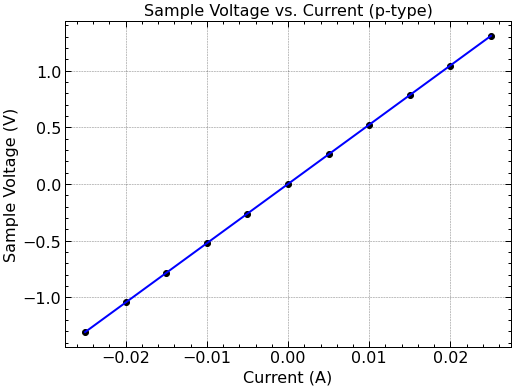

Hall Voltage Slope (p-type)        1.037818
Sample Conductivity (1/ohm·m)     38.248896
Carrier Density (C/m^3)          122.372109
Carrier Mobility (m^2/(V·s))       0.312562
dtype: float64


In [526]:
xvals = I*(10**(-3))
yvals = Vs

a, b = np.polyfit(xvals, yvals, 1)

yfit = (a*xvals) + b

plt.plot(xvals, yvals, marker = '.', markersize = 12, linestyle = 'none', color = 'black')
plt.plot(xvals, yfit, color = 'blue')
plt.xlabel('Current (A)')
plt.ylabel('Sample Voltage (V)')
plt.title('Sample Voltage vs. Current (p-type)')
plt.savefig('p_samplevcurrent', bbox_inches='tight')
plt.show()

Resistance_ptype = a

p_conduct = length/(Resistance_ptype*width*depth)

p_mobility = rh_p * p_conduct

p_dictionary = {'Hall Voltage Slope (p-type)': p_hallslope,'Sample Conductivity (1/ohm·m)': p_conduct, 'Carrier Density (C/m^3)': p_density, 'Carrier Mobility (m^2/(V·s))': p_mobility}

p_results = pd.Series(p_dictionary)

print(p_results)

## vs. Temperature

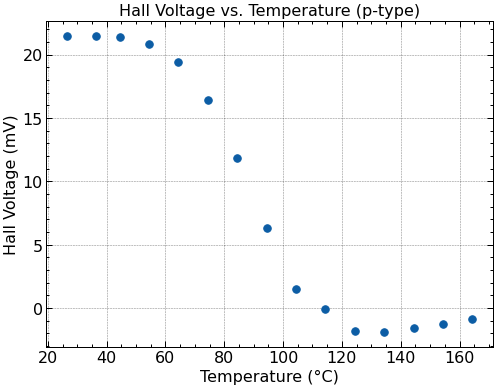

In [527]:
data=pd.read_csv('data/ptype_retrial/vtemp.csv')


Vs = data['Vs'].values
Vh = data['Vh'].values
B = data['B'].values
T = data['T'].values


xvals = T
yvals = -Vh


plt.plot(xvals, yvals, marker = '.', markersize = 15, linestyle = 'none')
plt.xlabel("Temperature (°C)")
plt.ylabel('Hall Voltage (mV)')
plt.title('Hall Voltage vs. Temperature (p-type)')
plt.savefig('p_hallvtemp', bbox_inches='tight')
plt.show()



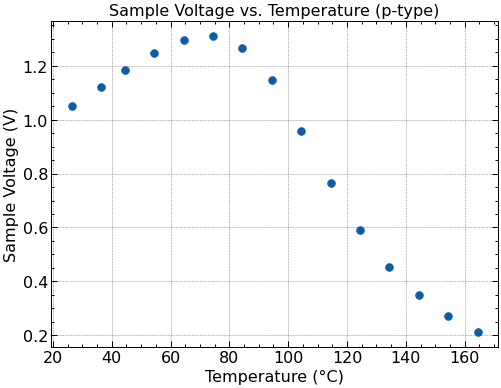

In [528]:
xvals = T
yvals = Vs

plt.plot(xvals, yvals, marker = '.', markersize = 15, linestyle = 'none')
plt.xlabel("Temperature (°C)")
plt.ylabel('Sample Voltage (V)')
plt.title('Sample Voltage vs. Temperature (p-type)')
plt.savefig('p_samplevtemp', bbox_inches='tight')
plt.show()

tempp = T
sampvp = Vs

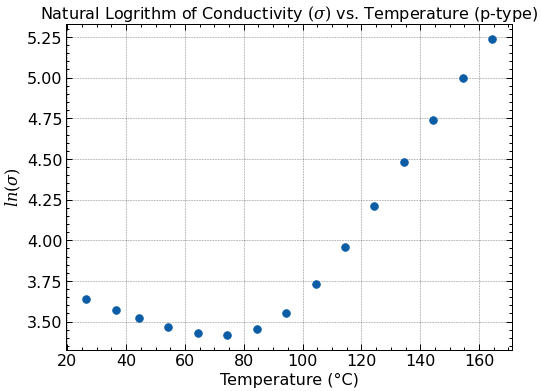

In [529]:
I = 20*((10)**(-3))
R_temp = Vs/I

conduct_temp = length/(R_temp*width*depth)

xvals = T #+ 273.15
#yvals = conduct_temp
yvals = np.log(conduct_temp)

plt.plot(xvals, yvals, marker = '.', markersize = 15, linestyle = 'none')
plt.xlabel("Temperature (°C)")
plt.ylabel(r'$ln(\sigma)$')
plt.title(r'Natural Logrithm of Conductivity $(\sigma)$ vs. Temperature (p-type)')
plt.savefig('p_condvtemp', bbox_inches='tight')
plt.show()

## vs. Magnetic Field

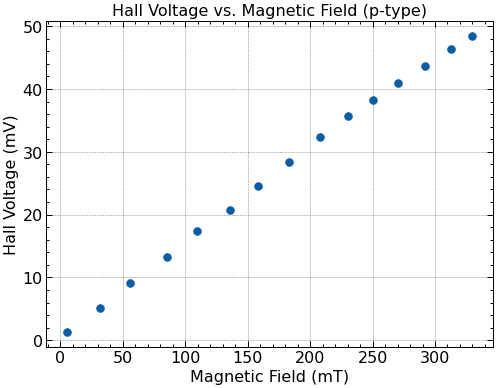

In [530]:
data=pd.read_csv('data/ptype_retrial/vmag.csv')

Vs = data['Vs'].values
Vh = data['Vh'].values
B = data['B'].values
VDC = data['VDC'].values


xvals = B
yvals = -Vh

plt.plot(xvals, yvals, marker = '.', markersize = 15, linestyle = 'none')
plt.xlabel('Magnetic Field (mT)')
plt.ylabel('Hall Voltage (mV)')
plt.title('Hall Voltage vs. Magnetic Field (p-type)')
plt.savefig('p_hallvmag', bbox_inches='tight')
plt.show()

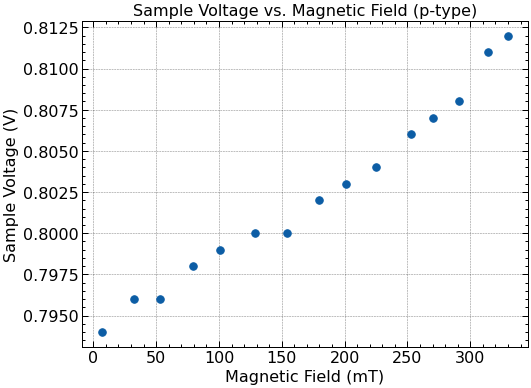

In [547]:
xvals = B
yvals = Vs

x_error = 3

plt.plot(xvals, yvals, marker = '.', markersize = 15, linestyle = 'none')
#plt.errorbar(xvals, yvals, xerr = x_error, fmt ='o')

plt.xlabel('Magnetic Field (mT)')
plt.ylabel('Sample Voltage (V)')
plt.title('Sample Voltage vs. Magnetic Field (p-type)')
plt.savefig('p_samplevmag', bbox_inches='tight')
plt.show()

# Intrinsic

## vs. Current

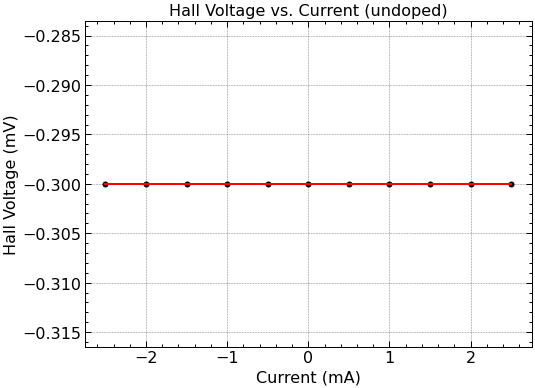

114.2


In [532]:
data=pd.read_csv('data/utype/vcurrent.csv')

Vs = data['Vs'].values
Vh = data['Vh'].values
B = data['B'].values
I = data['I'].values

B0 = B[0]*(10**(-3))

xvals = I
yvals = Vh - 0.3

a, b = np.polyfit(xvals, yvals, 1)

yfit = (a*xvals) + b

plt.plot(xvals, yvals, marker = '.', markersize = 10, linestyle = 'none', color = 'black')
plt.plot(xvals, yfit, color = 'red')
plt.xlabel('Current (mA)')
plt.ylabel('Hall Voltage (mV)')
plt.title('Hall Voltage vs. Current (undoped)')
plt.savefig('u_hallvcurrent', bbox_inches='tight')
plt.show()

u_hallslope = a
rh_u = (u_hallslope*depth)/B0

#u_density = 1/rh_u

print(B[0])

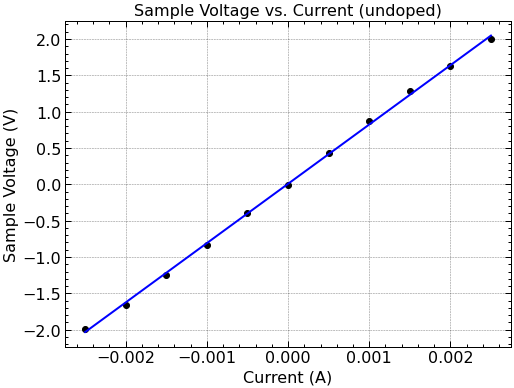

In [533]:
xvals = I*(10**(-3))
yvals = Vs

a, b = np.polyfit(xvals, yvals, 1)

yfit = (a*xvals) + b

plt.plot(xvals, yvals, marker = '.', markersize = 12, linestyle = 'none', color = 'black')
plt.plot(xvals, yfit, color = 'blue')
plt.xlabel('Current (A)')
plt.ylabel('Sample Voltage (V)')
plt.title('Sample Voltage vs. Current (undoped)')
plt.savefig('u_samplevcurrent', bbox_inches='tight')
plt.show()

Resistance_utype = a

u_conduct = length/(Resistance_utype*width*depth)

u_mobility = rh_u * u_conduct


u_dictionary = {'Hall Voltage Slope (undoped)': 0,'Sample Conductivity (1/ohm·m)': u_conduct, 'Carrier Density (C/m^3)': 'NaN', 'Carrier Mobility (m^2/(V·s))': 0}

u_results = pd.Series(u_dictionary)

## vs. Temperature

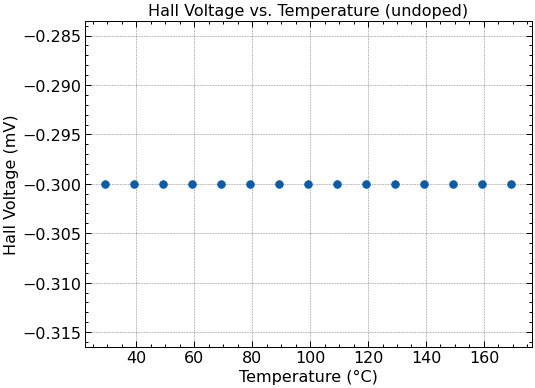

In [534]:
data=pd.read_csv('data/utype_retrial/vtemp.csv')

Vs = data['Vs'].values
Vh = data['Vh'].values
B = data['B'].values
T = data['T'].values


xvals = T
yvals = Vh


plt.plot(xvals, yvals, marker = '.', markersize = 15, linestyle = 'none')
plt.xlabel("Temperature (°C)")
plt.ylabel('Hall Voltage (mV)')
plt.title('Hall Voltage vs. Temperature (undoped)')
plt.savefig('u_hallvtemp', bbox_inches='tight')
plt.show()

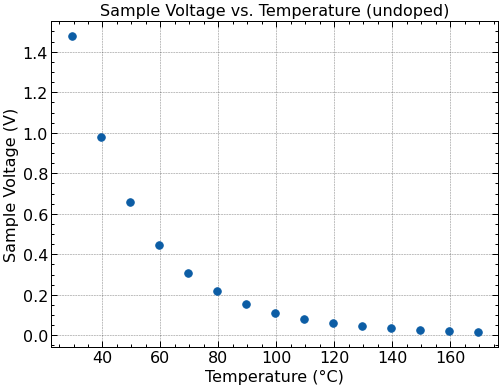

In [535]:
xvals = T
yvals = Vs


plt.plot(xvals, yvals, marker = '.', markersize = 15, linestyle = 'none')
plt.xlabel("Temperature (°C)")
plt.ylabel('Sample Voltage (V)')
plt.title('Sample Voltage vs. Temperature (undoped)')
plt.savefig('u_samplevtemp', bbox_inches='tight')
plt.show()

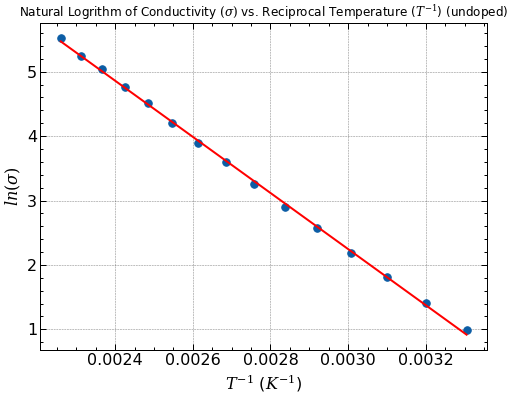

In [536]:
I = 2*((10)**(-3))
R_temp = Vs/I

conduct_temp = length/(R_temp*width*depth)

xvals = 1/(T+273.15)
yvals = conduct_temp
yvals = np.log(conduct_temp)

a, b = np.polyfit(xvals, yvals, 1)

yfit = (a*xvals) + b

plt.plot(xvals, yvals, marker = '.', markersize = 15, linestyle = 'none')
plt.plot(xvals, yfit, color = 'red')
plt.xlabel(r"$T^{-1}$ ($K^{-1}$)")
plt.ylabel(r'$ln(\sigma)$')
#plt.title(r'Natural Logrithm of Conductivity $(\sigma)$ vs. Temperature ($T$) (undoped)', fontsize = 12)
plt.title(r'Natural Logrithm of Conductivity $(\sigma)$ vs. Reciprocal Temperature ($T^{-1}$) (undoped)', fontsize = 12)
#plt.savefig('u_condvtemp', bbox_inches='tight')
plt.show()

gapslope = a

## Band Gap Energy

In [585]:
k=cnst.k
q=cnst.e
E_g = -2*k*(gapslope)

# N-TYPE

## vs. Current

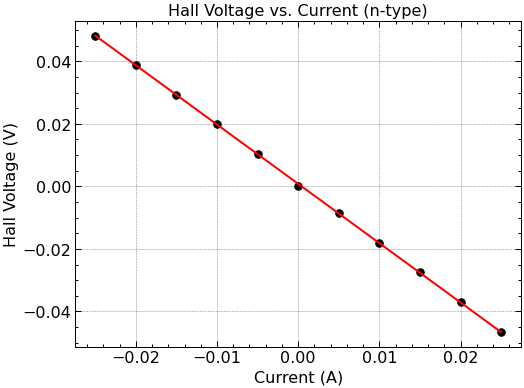

1.0378181818181822 -1.895454545454546
 
0.008171796707229782 -0.015410199556541024


In [538]:
data=pd.read_csv('data/ntype_retrial/vcurrent.csv')

Vs = data['Vs'].values
Vh = data['Vh'].values
B = data['B'].values
I = data['I'].values

B0 = B[0]*(10**(-3))

xvals = I*(10**(-3))
yvals = -Vh*(10**(-3))

a, b = np.polyfit(xvals, yvals, 1)

yfit = (a*xvals) + b 

plt.plot(xvals, yvals, marker = '.', markersize = 15, linestyle = 'none', color = 'black')
plt.plot(xvals, yfit, color = 'red')
plt.xlabel('Current (A)')
plt.ylabel('Hall Voltage (V)')
plt.title('Hall Voltage vs. Current (n-type)')
plt.savefig('n_hallvcurrent', bbox_inches='tight')
plt.show()

n_hallslope = a
rh_n = (n_hallslope*depth)/B0

n_density = 1/rh_n
print(p_hallslope, n_hallslope)

print(' ')

print(rh_p, rh_n)

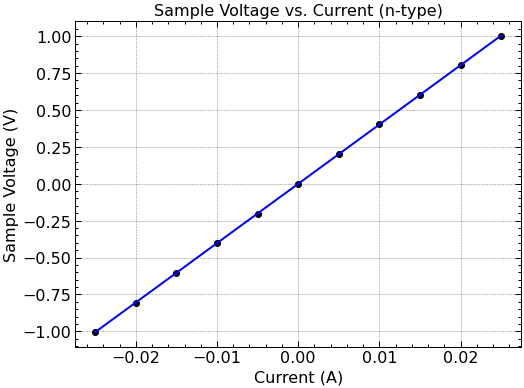

In [539]:
xvals = I*(10**(-3))
yvals = Vs

a, b = np.polyfit(xvals, yvals, 1)

yfit = (a*xvals) + b

plt.plot(xvals, yvals, marker = '.', markersize = 12, linestyle = 'none', color = 'black')
plt.plot(xvals, yfit, color = 'blue')
plt.xlabel('Current (A)')
plt.ylabel('Sample Voltage (V)')
plt.title('Sample Voltage vs. Current (n-type)')
plt.savefig('n_samplevcurrent', bbox_inches='tight')
plt.show()

Resistance_ntype = a

n_conduct = length/(Resistance_ntype*width*depth)

n_mobility = rh_n * n_conduct

n_dictionary = {'Hall Voltage Slope (n-type)': n_hallslope,'Sample Conductivity (1/ohm·m)': n_conduct, 'Carrier Density (C/m^3)': n_density, 'Carrier Mobility (m^2/(V·s))': n_mobility}

n_results = pd.Series(n_dictionary)

## vs. Temperature

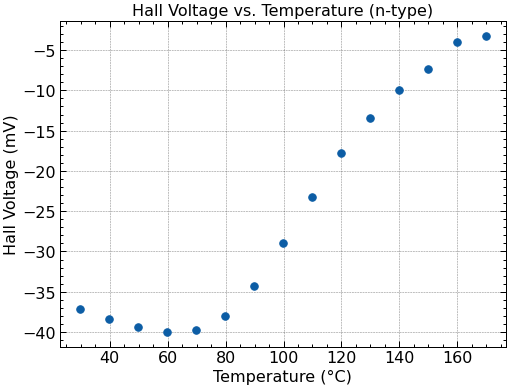

In [540]:
data=pd.read_csv('data/ntype_retrial/vtemp.csv')

Vs = data['Vs'].values
Vh = data['Vh'].values
B = data['B'].values
T = data['T'].values


xvals = T
yvals = -Vh


plt.plot(xvals, yvals, marker = '.', markersize = 15, linestyle = 'none')
plt.xlabel("Temperature (°C)")
plt.ylabel('Hall Voltage (mV)')
plt.title('Hall Voltage vs. Temperature (n-type)')
plt.savefig('n_hallvtemp', bbox_inches='tight')
plt.show()

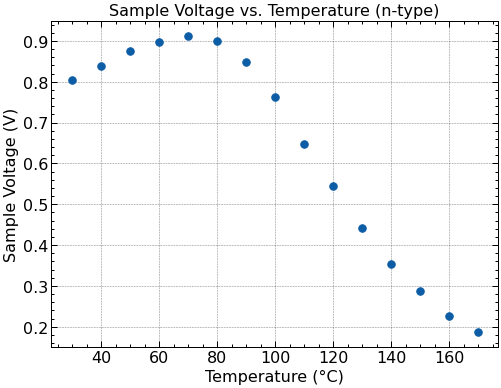

In [541]:
xvals = T
yvals = Vs

plt.plot(xvals, yvals, marker = '.', markersize = 15, linestyle = 'none')
plt.xlabel("Temperature (°C)")
plt.ylabel('Sample Voltage (V)')
plt.title('Sample Voltage vs. Temperature (n-type)')
plt.savefig('n_samplevtemp', bbox_inches='tight')
plt.show()

tempn = T
sampvn = Vs

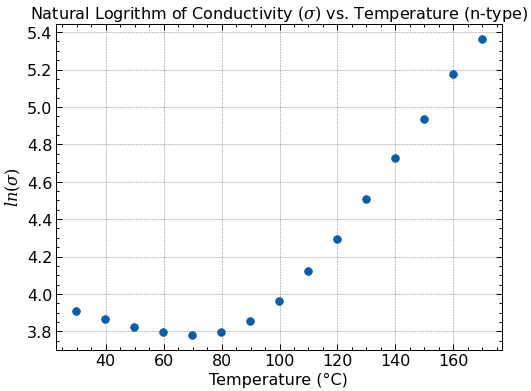

In [542]:
I = 20*((10)**(-3))
R_temp = Vs/I

conduct_temp = length/(R_temp*width*depth)

xvals = T
yvals = np.log(conduct_temp)

plt.plot(xvals, yvals, marker = '.', markersize = 15, linestyle = 'none')
plt.xlabel("Temperature (°C)")
plt.ylabel(r'$ln(\sigma)$')
plt.title(r'Natural Logrithm of Conductivity $(\sigma)$ vs. Temperature (n-type)')
plt.savefig('n_condvtemp', bbox_inches='tight')
plt.show()

## vs. Magnetic Field

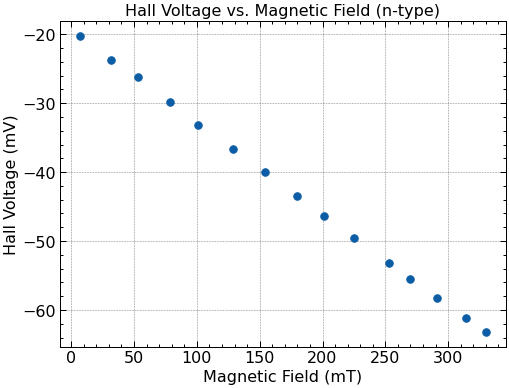

In [543]:
data=pd.read_csv('data/ntype_retrial/vmag.csv')

Vs = data['Vs'].values
Vh = data['Vh'].values
B = data['B'].values
VDC = data['VDC'].values


xvals = B
yvals = -Vh

plt.plot(xvals, yvals, marker = '.', markersize = 15, linestyle = 'none')
plt.xlabel('Magnetic Field (mT)')
plt.ylabel('Hall Voltage (mV)')
plt.title('Hall Voltage vs. Magnetic Field (n-type)')
plt.savefig('n_hallvmag', bbox_inches='tight')
plt.show()

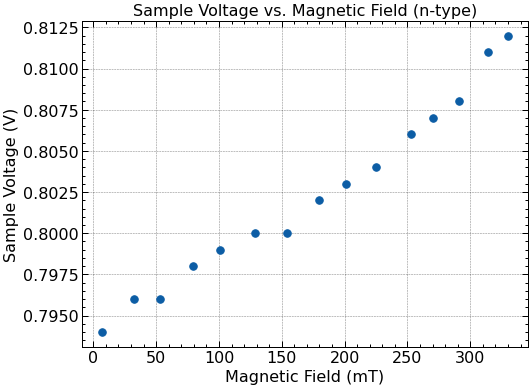

In [544]:
xvals = B
yvals = Vs

plt.plot(xvals, yvals, marker = '.', markersize = 15, linestyle = 'none')
plt.xlabel('Magnetic Field (mT)')
plt.ylabel('Sample Voltage (V)')
plt.title('Sample Voltage vs. Magnetic Field (n-type)')
plt.savefig('n_samplevmag', bbox_inches='tight')
plt.show()

## ^^ That's somewhat linear..?

In [545]:
print('p-type data: \n')
print(p_results)

print('\n')
print('----------------------------------------------------------------')

print('undoped data: \n')
print(u_results)

print('\n')
print('----------------------------------------------------------------')

print('n-type data: \n')
print(n_results)

p-type data: 

Hall Voltage Slope (p-type)        1.037818
Sample Conductivity (1/ohm·m)     38.248896
Carrier Density (C/m^3)          122.372109
Carrier Mobility (m^2/(V·s))       0.312562
dtype: float64


----------------------------------------------------------------
undoped data: 

Hall Voltage Slope (undoped)           0
Sample Conductivity (1/ohm·m)    2.45104
Carrier Density (C/m^3)              NaN
Carrier Mobility (m^2/(V·s))           0
dtype: object


----------------------------------------------------------------
n-type data: 

Hall Voltage Slope (n-type)      -1.895455
Sample Conductivity (1/ohm·m)    49.780513
Carrier Density (C/m^3)         -64.892086
Carrier Mobility (m^2/(V·s))     -0.767128
dtype: float64


In [609]:
mu_e = 0.39
mu_h = 0.19

r_e = 0.56
r_h = 0.29

eff_me = me*r_e
eff_mh = me*r_h

T_und = 300

C = 4*(((k*T_und)/(2*pi*(hbar**2)))**3)
Meff = (eff_me*eff_mh)**(3/2)

rexp = (-E_g)/(k*T_und)


n_sq = C*Meff*(np.exp(rexp))

n = np.sqrt(n_sq)


sigma = (length)/(Resistance_utype*width*depth)


print(Resistance_ptype)

(0.02)/(52.289*0.01*0.001)

print(p_hallslope)


print(0.127/(p_hallslope*0.001*q))


(p_hallslope*38.249*0.001)/(0.127)

52.28909090909093
1.0378181818181822
7.637866307832587e+20


0.31256305225483194